# Netflix Movie Clustering

## Agenda of this Project
- Demonstrating an understanding of the dataset and the problem statement.
- Conducting efficient Exploratory Data Analysis (EDA).
- Addressing missing values and outliers present in the data.
- Cleaning the document data.
- Exploring any exceptional or unusual cases within the data.
- Performing pre-processing steps such as TF-IDF.
- Selecting the appropriate approach and algorithm to be used for the task.
- Modeling the data using at least two different algorithms.
- Providing a brief strategy for the clusters that are formed.
- Concluding the project findings.
- Explaining the usefulness of the project to stakeholders.

## Understanding of the dataset.

This dataset consists of tv shows and movies available on Netflix as of 2019. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. This dataset is clustering based problem. 

- A clustering-based problem is a type of unsupervised machine learning problem where the goal is to group a set of data points into clusters based on their similarity.
- Unsupervised Learning: Unlike supervised learning, where you have labeled data (input-output pairs), clustering deals with unlabeled data. The algorithm must discover the structure on its own.
- Grouping Similar Data Points
- No Predefined Classes

# Problem Statement:

**The objective of this analysis is to segment Netflix's content catalog (movies and TV shows) into distinct clusters based on shared characteristics, and to identify the key factors that differentiate these clusters. This will help to understand audience preferences, content strategy, and market trends, which can inform decisions related to content acquisition, production, and recommendation systems.**

## Data Inspection
- Understand the data's format and organization

In [1]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\bsson\Desktop\Labmentix_Internship\Projects\Project_1_Netflix\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0  14-Aug-20          2020  TV-MA  4 Seasons   
1  23-Dec-16          2016  TV-MA     93 min   
2  20-Dec-18          2011      R     78 min   
3  16-Nov-17          2009  PG-13     80 min   
4   1-Jan-20          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

## Exploratory Data Analysis

- It is the initial process of analyzing data to summarize its key characteristics, often visually.
- It helps in understanding the data's structure, identifying patterns, and detecting potential issues like missing values or outliers. 
- EDA aims to generate hypotheses and inform subsequent modeling or analytical steps.

In [4]:
# Knowing what features available in data
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

- Shape - Returns the no. of rows & columns

In [5]:
df.shape

(7787, 12)

##### Note: There are 12 Columns (Features) available and 7787 data points available

- Info - provides a concise summary of a DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


##### Note:

- The DataFrame contains 7787 entries (rows).
- There are a total of 12 columns.
- The director, cast, and country, release_year, rating columns have missing values (fewer than 7787 non-null entries).
- Most columns have a data type of object, which typically indicates strings or mixed types.
- The release_year column has an integer data type.

- Describe: Generate descriptive statistics of the numerical columns in a DataFrame

In [9]:
df.describe(include='all').transpose()

count unique  \
show_id         7787   7787   
type            7787      2   
title           7787   7787   
director        5398   4049   
cast            7069   6831   
country         7280    681   
date_added      7777   1565   
release_year  7787.0    NaN   
rating          7780     14   
duration        7787    216   
listed_in       7787    492   
description     7787   7769   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  5377   
title                                                        3%     1   
director                                 Raúl Campos, Jan Suter    18   
cast                                         David Attenborough    18   
country                                           United States  2555   
date_added                                             1-Jan-20   118   
release_year                                                NaN   NaN   
rating                                                    TV-MA  2863   
duration                                               1 Season  1608   
listed_in                                         Documentaries   334   
description   Multiple women report their husbands as missin...     3   

                    mean       std     min     25%     50%     75%     max  
show_id              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added           NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0  2021.0  
rating               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description          NaN       NaN     NaN     NaN     NaN     NaN     NaN

##### Note:

- Most text-based columns (show_id, title, director, cast, country, date_added, rating, duration, listed_in, description) have a high number of unique values.
- Type has only two categories: 'Movie' is more frequent than 'TV Show'.
- Column release_year shows a range from 1925 to 2021, with an average around 2014.
- There are missing values in director, cast, and country.


#### Handling Missing Values

In [11]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
# Missing Values in percentage 
(df.isnull().sum()/(len(df)))*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [13]:
# Drop these columns
columns_to_drop = ['date_added','show_id','duration','director']

# Drop the columns
df = df.drop(columns=columns_to_drop)
df.head()

type  title                                               cast  \
0  TV Show     3%  João Miguel, Bianca Comparato, Michel Gomes, R...   
1    Movie   7:19  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2    Movie  23:59  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3    Movie      9  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4    Movie     21  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   

         country  release_year rating  \
0         Brazil          2020  TV-MA   
1         Mexico          2016  TV-MA   
2      Singapore          2011      R   
3  United States          2009  PG-13   
4  United States          2008  PG-13   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [14]:
# Handling Missing Values & Dropping it
df.dropna(inplace=True)

In [15]:
(df.isnull().sum()/(len(df)))*100

type            0.0
title           0.0
cast            0.0
country         0.0
release_year    0.0
rating          0.0
listed_in       0.0
description     0.0
dtype: float64

In [16]:
df.shape

(6652, 8)

##### Note:
- After dropping the some columns as well as missing values.
- There are some changes in shape of data 
- Now data have 6652 rows and 8 features

In [17]:
!pip install missingno

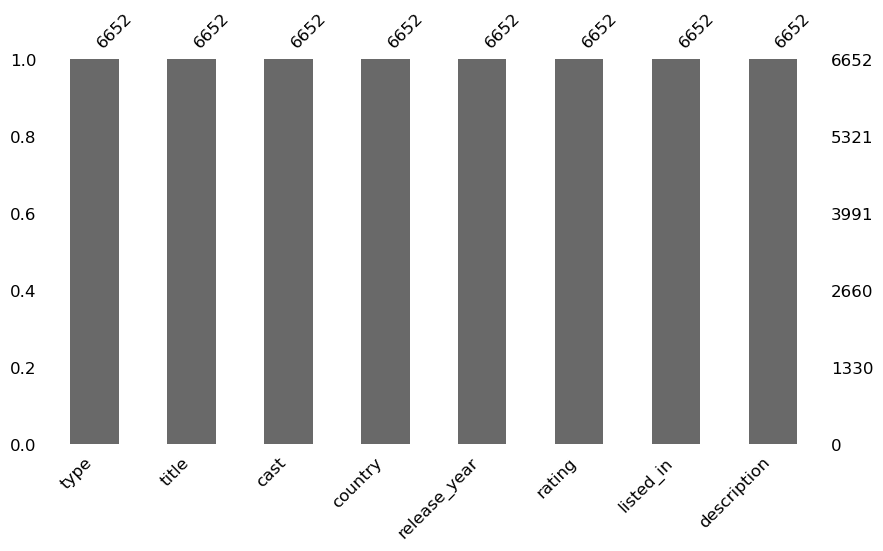

In [18]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, figsize=(10,5), fontsize=12)
plt.show()

#### Duplicate Values

In [20]:
df.duplicated().sum()

0

- Note: No Duplicate Value

In [22]:
df.nunique()

type               2
title           6652
cast            6473
country          626
release_year      71
rating            14
listed_in        475
description     6646
dtype: int64

In [23]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f'number of unique values in {i} column : {df[i].nunique()}    \nunique values :\n{df[i].unique()}')
  print('****'*30)
  print()
     

number of unique values in type column : 2    
unique values :
['TV Show' 'Movie']
************************************************************************************************************************

number of unique values in title column : 6652    
unique values :
['3%' '7:19' '23:59' ... 'Zozo' 'Zubaan' "Zumbo's Just Desserts"]
************************************************************************************************************************

number of unique values in cast column : 6473    
unique values :
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Imad Creidi, Antoinette Turk, Elias Gergi, Carmen Lebbos, Viktor Axelsson, Charbel Iskand

#### Outlier Detection

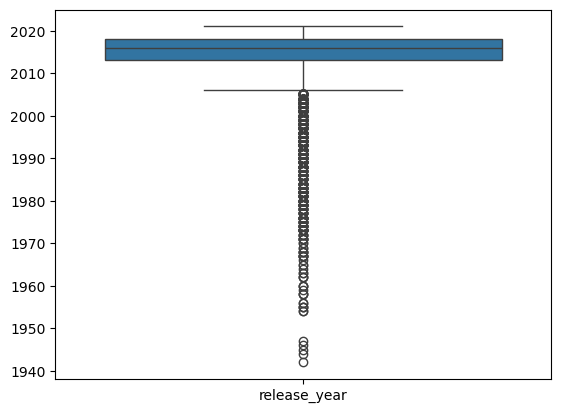

In [25]:
sns.boxplot(data=df)
plt.show()

Note:
- Since, the almost all of the data present in textual format except release year.
- The data that we need to create cluster/building model are present in textual format. So, there is no need to perform handling outlier.

# Data Visualization
-  Graphical representation of information and data.

### Visualization 1
##### TV Shows Vs Movies

- Perform first visualization between TV Shows and Movies

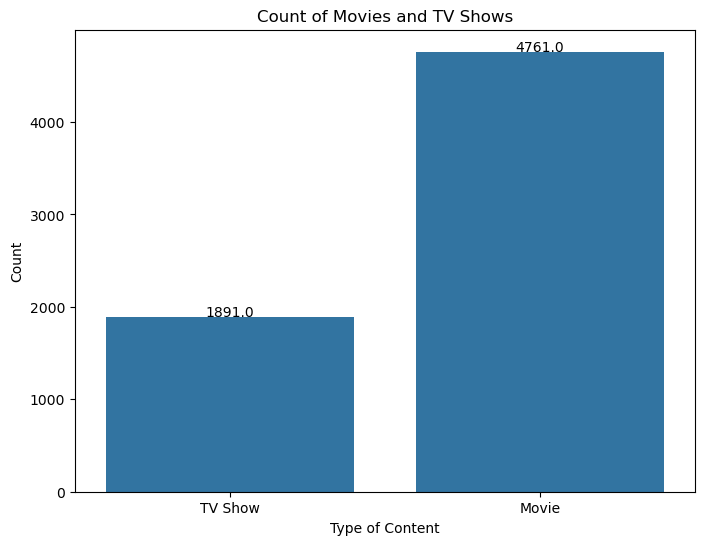

In [29]:
# Count Plot on single categorical variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='type')  # Use 'type' column

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            f'{height}',
            ha='center')

plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.title('Count of Movies and TV Shows')
plt.show()


##### Note:
- There are total count of:
- a) TV Shows is 1891
- b) Movies is 4761

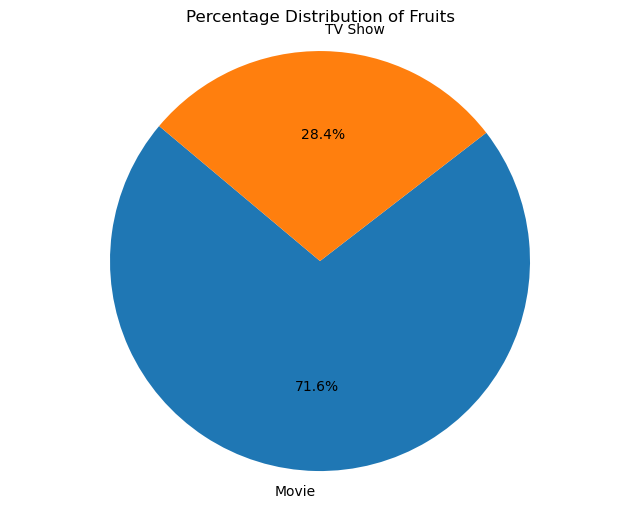

In [30]:
# Calculate percentage for each category
tvtype_counts = df['type'].value_counts()
labels = tvtype_counts.index
sizes = tvtype_counts.values

# Plotting a pie chart using Matplotlib
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Fruits')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### Note:
- In terms of Pie Chart:
- Movie have 71.6% distribution.
- TV Shows have only 28.4%

### Visualization 2
##### Top 10 Shows 

- Create a barplot of Top 10 shows 

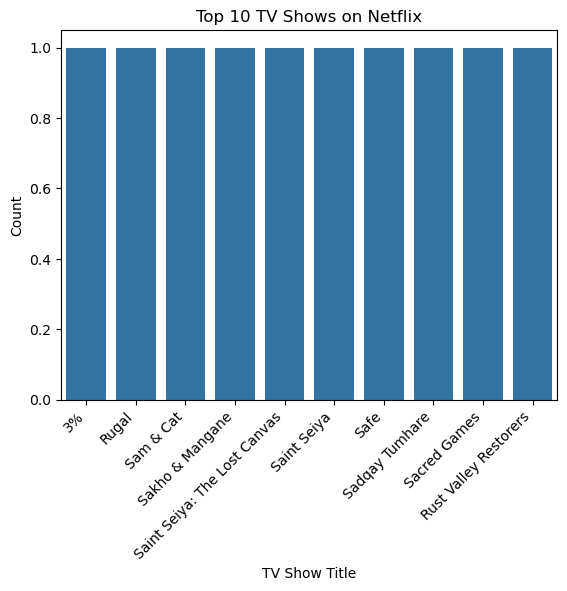

In [32]:
df_shows = df[df['type'] == 'TV Show']
top_10_shows = df_shows['title'].value_counts().head(10)

# Create the barplot using the aggregated data
ax = sns.barplot(x=top_10_shows.index, y=top_10_shows.values) # Changed to barplot


plt.xlabel('TV Show Title')
plt.ylabel('Count')
plt.title('Top 10 TV Shows on Netflix')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

##### Note:
- There are top famous 10 TV Shows listed in above bar gragh

##### Top 10 Movies 
- Create a barplot of Top 10 Movies

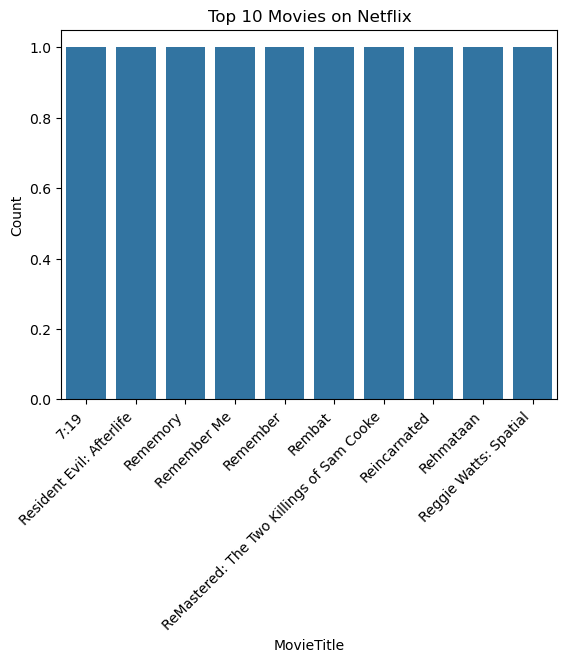

In [34]:
df_movies = df[df['type'] == 'Movie']
top_10_movies = df_movies['title'].value_counts().head(10)

# Create the barplot using the aggregated data
ax = sns.barplot(x=top_10_movies.index, y=top_10_movies.values) # Changed to barplot


plt.xlabel('MovieTitle')
plt.ylabel('Count')
plt.title('Top 10 Movies on Netflix')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

### Visualization 3
##### Creating a World Map 

- Shows count of Both Movie and TV Shows on World Map

##### Here's a brief summary of the code:

- Counts content by country: A function processes the 'country' column, handling multiple countries per entry, and counts the total movies and TV shows for each.
- Creates a DataFrame: The country-wise counts are stored in a pandas DataFrame.
- Visualizes on a world map: Plotly's choropleth function generates an interactive map where countries are colored based on their total content count.
- Provides details on hover: Hovering over a country shows its name and the breakdown of movies and TV shows.
- Customizes the map: The code adjusts the map's size and the appearance of the hover information.

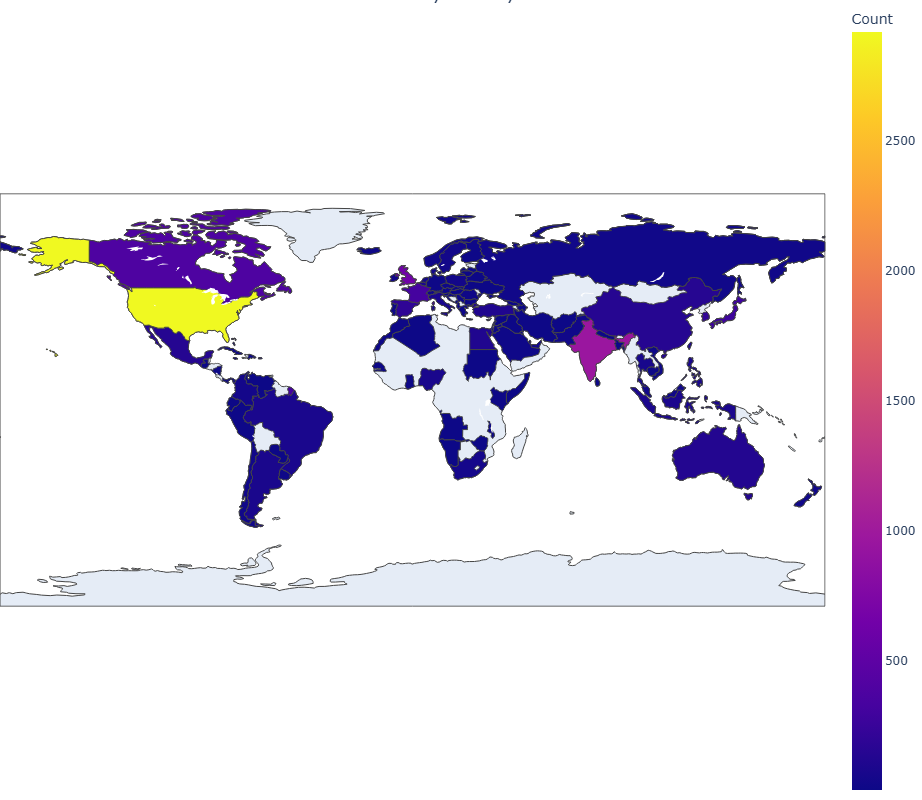

In [37]:
import plotly.express as px

# 1. Count Content by Country
# Function to handle multiple countries in the 'country' column
def count_content_by_country(df):
    country_counts = {}
    movie_counts = {}
    tv_show_counts = {}
    for countries in df['country'].dropna():  # Drop rows where country is missing
        # Split the string of countries into a list
        country_list = [c.strip() for c in countries.split(',')]
        for country in country_list:
            if country in country_counts:
                country_counts[country] += 1
            else:
                country_counts[country] = 1
            
            # Count Movies and TV Shows for each country
            movie_count = df[(df['country'].str.contains(country, na=False)) & (df['type'] == 'Movie')].shape[0]
            tv_show_count = df[(df['country'].str.contains(country, na=False)) & (df['type'] == 'TV Show')].shape[0]
            movie_counts[country] = movie_count
            tv_show_counts[country] = tv_show_count

    # Convert the dictionary to a DataFrame
    country_df = pd.DataFrame(list(country_counts.items()), columns=['Country', 'Count'])
    country_df['Movie_Count'] = country_df['Country'].map(movie_counts)
    country_df['TV_Show_Count'] = country_df['Country'].map(tv_show_counts)
    country_df['Content_Info'] = country_df.apply(lambda row: f"Movies: {row['Movie_Count']}, TV Shows: {row['TV_Show_Count']}", axis=1)
    return country_df

country_df = count_content_by_country(df)

# 2. Prepare Data for Plotting (No preparation needed in this case as country names are standard)

# 3. Create World Map
fig = px.choropleth(country_df,
                    locations='Country',
                    locationmode='country names',
                    color='Count',
                    hover_name='Country',  # Display country name on hover
                    hover_data=['Content_Info'],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Number of Movies and TV Shows on Netflix by Country'
                    )

fig.update_layout(
        height=800,
        width=1000,
    margin=dict(l=0, r=0, b=0, t=0)  # Adjust margins as needed
    )

fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Arial"
    )
)

fig.show()


##### Note:
- World map visualizing the number of movies and TV shows available on Netflix, broken down by country.

In [38]:
df.columns

Index(['type', 'title', 'cast', 'country', 'release_year', 'rating',
       'listed_in', 'description'],
      dtype='object')

### Visualization 4
##### Highest Numbers Movies/TV shows done by Cast


In [40]:
# 1. Splitting the 'cast' column into individual actors and Counting occurrences
cast_counts = df['cast'].str.split(', ', expand=True).stack().sort_values()
cast_counts.value_counts()

Anupam Kher          42
Shah Rukh Khan       34
Om Puri              30
Akshay Kumar         29
Naseeruddin Shah     29
                     ..
Kiran Vairale         1
Kiran Sonia Sawar     1
Kiran Rathod          1
Kiran Raj             1
Ṣọpẹ́ Dìrísù          1
Name: count, Length: 31718, dtype: int64

In [41]:
print(f"number of TV Shows actor : {len(df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts())}")
print(f"number of Movie actor : {len(df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts())}")     

number of TV Shows actor : 12665
number of Movie actor : 22622


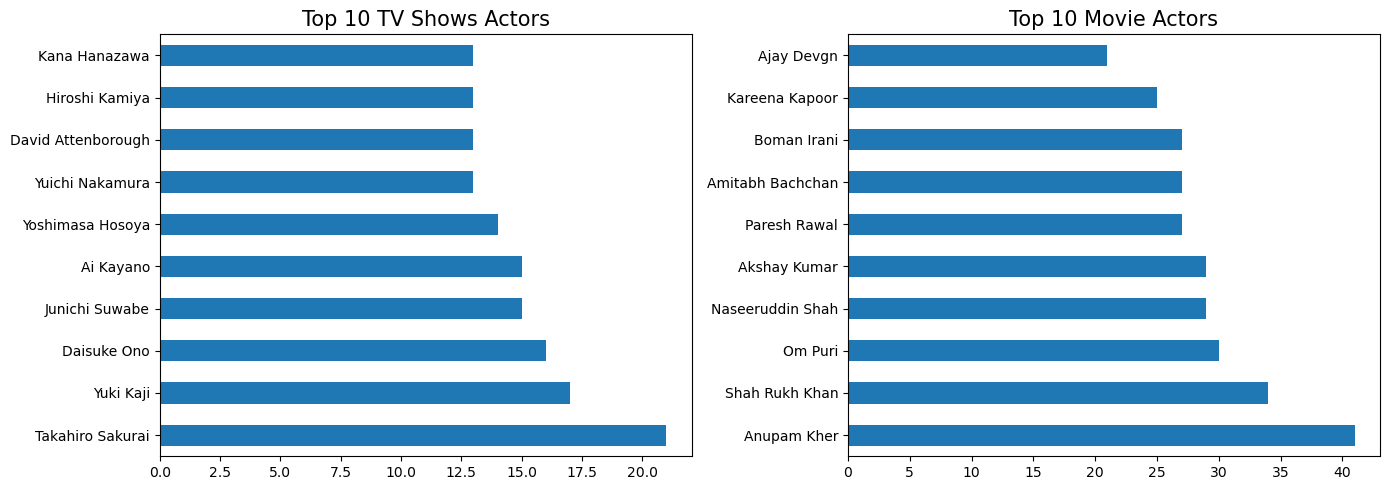

In [42]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# Separating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
# plotting actor who appered highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV Shows Actors', size=15)

# Separating movie actor from cast column
top_movie_actor = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
# plotting actor who appered highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie Actors', size=15)

plt.tight_layout()
plt.show()
     

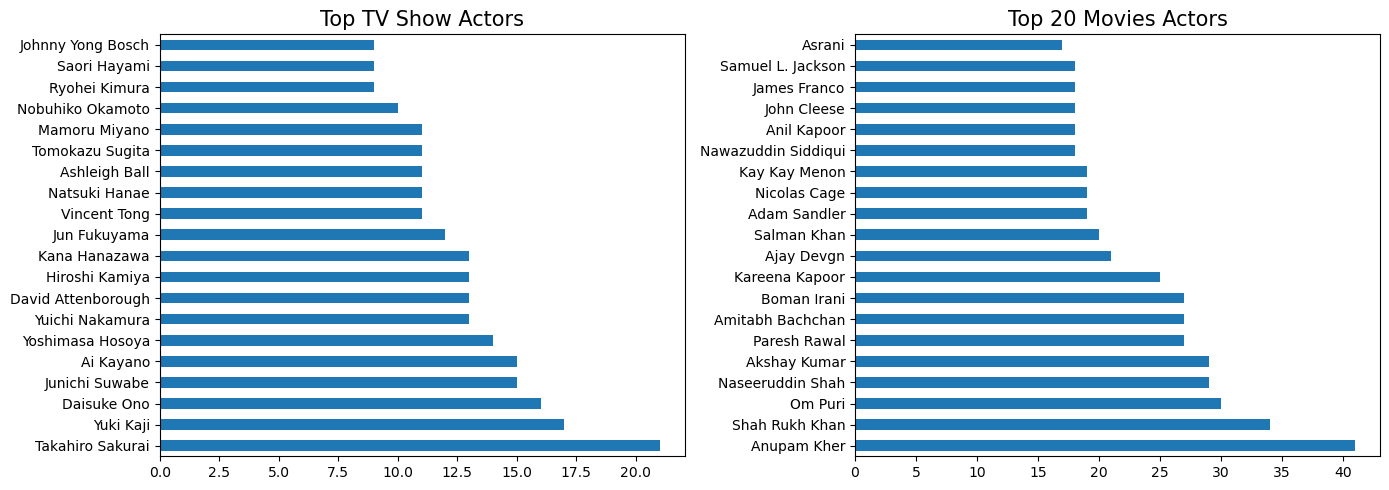

In [43]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

#1) TV Shows
# Separating TV shows actor from cast column
shows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Plotting actors who appeared in the highest number of TV shows
shows_actor.value_counts().head(20).plot(kind='barh', ax=ax[0])
ax[0].set_title('Top TV Show Actors', size=15)


#2) Movie
# Separating movie actor from cast column
movie_actor = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# plotting actor who appered highest number of Movie
movie_actor.value_counts().head(20).plot(kind='barh', ax=ax[1])
ax[1].set_title('Top 20 Movies Actors', size=15)

plt.tight_layout()
plt.show()

### Visualization 5
##### Listed In/Genre

##### Creating A WordCloud of Genre

- A word cloud (also known as a tag cloud) is a visualization technique used to represent text data. 

In [46]:
# Count the value 
df["listed_in"].value_counts()

listed_in
Dramas, International Movies                                                       307
Stand-Up Comedy                                                                    292
Comedies, Dramas, International Movies                                             240
Dramas, Independent Movies, International Movies                                   213
Documentaries                                                                      160
                                                                                  ... 
Classic & Cult TV, TV Horror, TV Mysteries                                           1
Docuseries, TV Comedies                                                              1
Dramas, Horror Movies, Sci-Fi & Fantasy                                              1
TV Comedies, TV Dramas, TV Sci-Fi & Fantasy                                          1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: count, Length: 475, dtype: 

In [47]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bsson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### Note:
- The Natural Language Toolkit (NLTK) is a powerful Python library for working with human language data. One of its useful features is the stopwords corpus.
- Stopwords are common words in a language that are often filtered out during text processing because they usually don't contribute much to the meaning of the text in the context of tasks like information retrieval or text classification. Examples in English include "the", "a", "is", "and", etc.

In [48]:
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords

text = ' '.join(df['listed_in'].astype(str).tolist())

text = re.sub(r'[^A-Za-z\s]', '', text)

text = text.lower()

stops = set(stopwords.words('english'))
text = ' '.join(word for word in text.split() if word not in stops)

In [49]:
text

'international tv shows tv dramas tv scifi fantasy dramas international movies horror movies international movies action adventure independent movies scifi fantasy dramas international tv shows tv dramas tv mysteries horror movies international movies dramas horror movies international movies horror movies international movies thrillers dramas thrillers crime tv shows international tv shows tv dramas documentaries international movies sports movies independent movies scifi fantasy thrillers dramas international movies thrillers dramas thrillers comedies dramas independent movies sports movies dramas independent movies international movies action adventure dramas international movies dramas international movies dramas international movies anime series international tv shows horror movies international movies thrillers documentaries international movies tv comedies dramas international movies romantic movies dramas international movies romantic movies comedies comedies romantic movies co

##### Note:
- Combines genres: Takes all entries from the 'listed_in' column and merges them into a single text string.
- Cleans text: Removes any characters that are not letters or spaces.
- Lowercases text: Converts all text to lowercase for consistency.
- Removes stopwords: Filters out common English words (like "the", "a", "in") that usually don't carry significant meaning for word analysis.
- The result is a cleaned text string ready to be used for generating a word cloud of the most frequent genres.

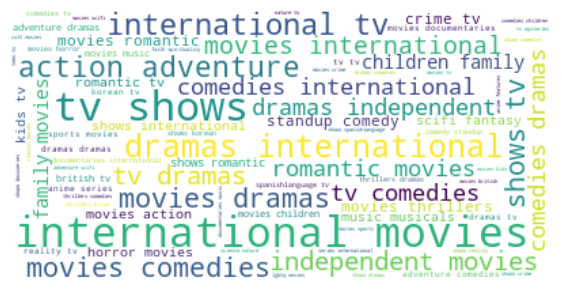

In [50]:
# create the word cloud
wordcloud = WordCloud(stopwords=stops,background_color='white').generate(text)

# plot the word cloud
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()
     

##### - Creating bargragh from wordcloud of most used words

In [52]:
from collections import Counter
words = text.split()  
word_counts = Counter(words)
top_words = word_counts.most_common()
top_words

[('movies', 4562),
 ('tv', 4107),
 ('international', 3170),
 ('dramas', 2672),
 ('shows', 2134),
 ('comedies', 1879),
 ('action', 840),
 ('adventure', 840),
 ('romantic', 794),
 ('independent', 668),
 ('thrillers', 525),
 ('children', 466),
 ('family', 466),
 ('documentaries', 387),
 ('horror', 369),
 ('crime', 340),
 ('standup', 338),
 ('comedy', 338),
 ('kids', 318),
 ('scifi', 286),
 ('fantasy', 286),
 ('music', 270),
 ('musicals', 270),
 ('anime', 190),
 ('british', 185),
 ('docuseries', 159),
 ('sports', 148),
 ('series', 135),
 ('reality', 132),
 ('korean', 132),
 ('spanishlanguage', 129),
 ('classic', 122),
 ('mysteries', 85),
 ('cult', 84),
 ('lgbtq', 75),
 ('teen', 57),
 ('features', 55),
 ('science', 52),
 ('nature', 52),
 ('faith', 51),
 ('spirituality', 51),
 ('talk', 39)]

In [53]:
sorted_words = sorted(top_words, key=lambda item: item[1],reverse=True)
sorted_words

[('movies', 4562),
 ('tv', 4107),
 ('international', 3170),
 ('dramas', 2672),
 ('shows', 2134),
 ('comedies', 1879),
 ('action', 840),
 ('adventure', 840),
 ('romantic', 794),
 ('independent', 668),
 ('thrillers', 525),
 ('children', 466),
 ('family', 466),
 ('documentaries', 387),
 ('horror', 369),
 ('crime', 340),
 ('standup', 338),
 ('comedy', 338),
 ('kids', 318),
 ('scifi', 286),
 ('fantasy', 286),
 ('music', 270),
 ('musicals', 270),
 ('anime', 190),
 ('british', 185),
 ('docuseries', 159),
 ('sports', 148),
 ('series', 135),
 ('reality', 132),
 ('korean', 132),
 ('spanishlanguage', 129),
 ('classic', 122),
 ('mysteries', 85),
 ('cult', 84),
 ('lgbtq', 75),
 ('teen', 57),
 ('features', 55),
 ('science', 52),
 ('nature', 52),
 ('faith', 51),
 ('spirituality', 51),
 ('talk', 39)]

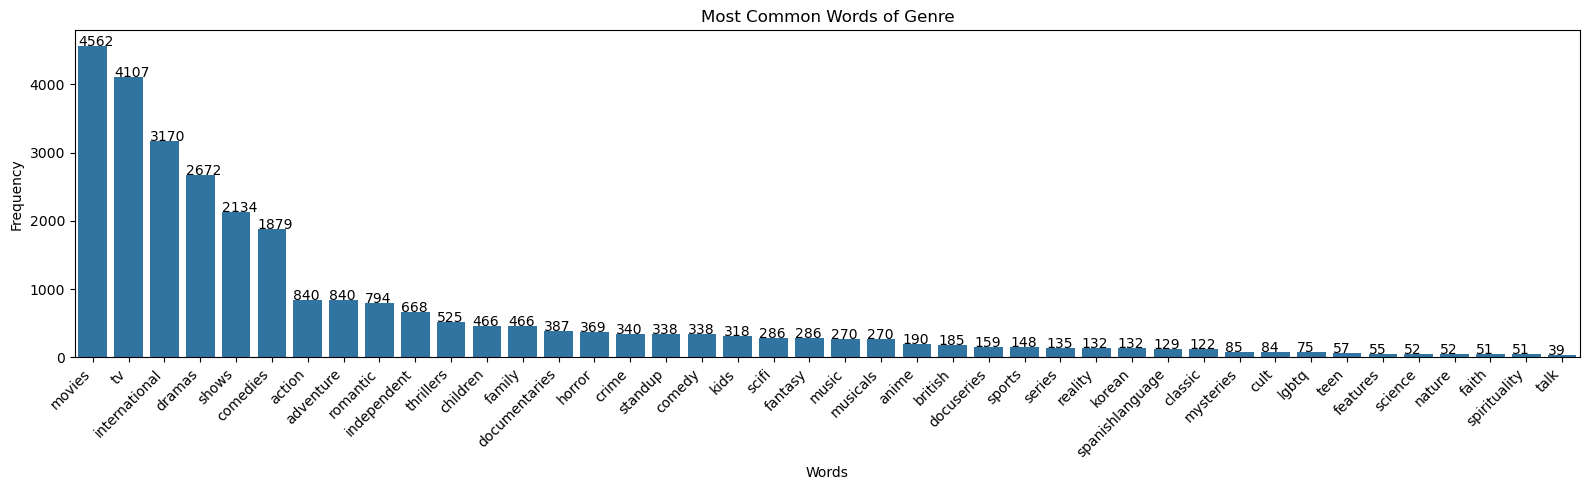

In [54]:
word = [item[0] for item in sorted_words]
count = [item[1] for item in sorted_words]

# 3. Create a Pandas DataFrame
data = {'Word': word, 'Frequency': count}  # Create a dictionary
data = pd.DataFrame(data) 

# plotting graph
plt.figure(figsize=(16,5))
graph = sns.barplot(x=word, y=count, data = data)
graph.set_title('Most Common Words of Genre', size=20)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Words of Genre")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.show()

##### Notes:
- With the help of Counter library, it count the no. of words:
- Sort them out in descencing form.
- Creating a dataframe and plot the visualization form
- Graph visualizes top common words are movies, tv, international, dramas
- Frequency lies from 4562 to 39

##### - Creating top 10 genres 

In [56]:
# seprating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Top 10 genre in listed movie/show
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres[:10]

genre  count
0      International Movies   2200
1                    Dramas   2053
2                  Comedies   1423
3    International TV Shows    970
4        Action & Adventure    700
5        Independent Movies    668
6                 TV Dramas    619
7           Romantic Movies    516
8                 Thrillers    479
9  Children & Family Movies    466

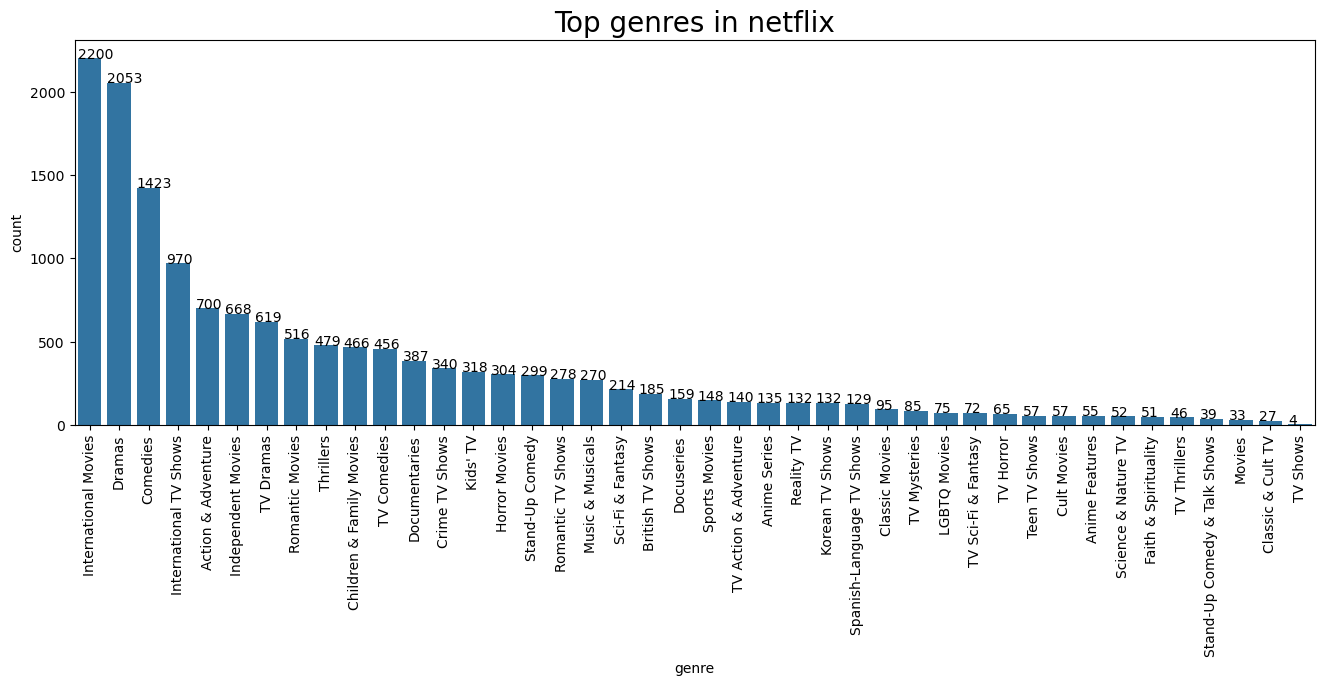

In [57]:
# plotting graph
plt.figure(figsize=(16,5))
graph = sns.barplot(x='genre', y='count', data=genres)
graph.set_title('Top genres in netflix', size=20)
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.show()

##### Note:
Graph visualizes top genres with heighest frequencies:
- International movies (2200)
- Dramas (2053)
- Comedies (1423)

### Visualization 6
##### Ratings

In [59]:
df.columns

Index(['type', 'title', 'cast', 'country', 'release_year', 'rating',
       'listed_in', 'description'],
      dtype='object')

##### - Movie/TV Shows Release per Year 

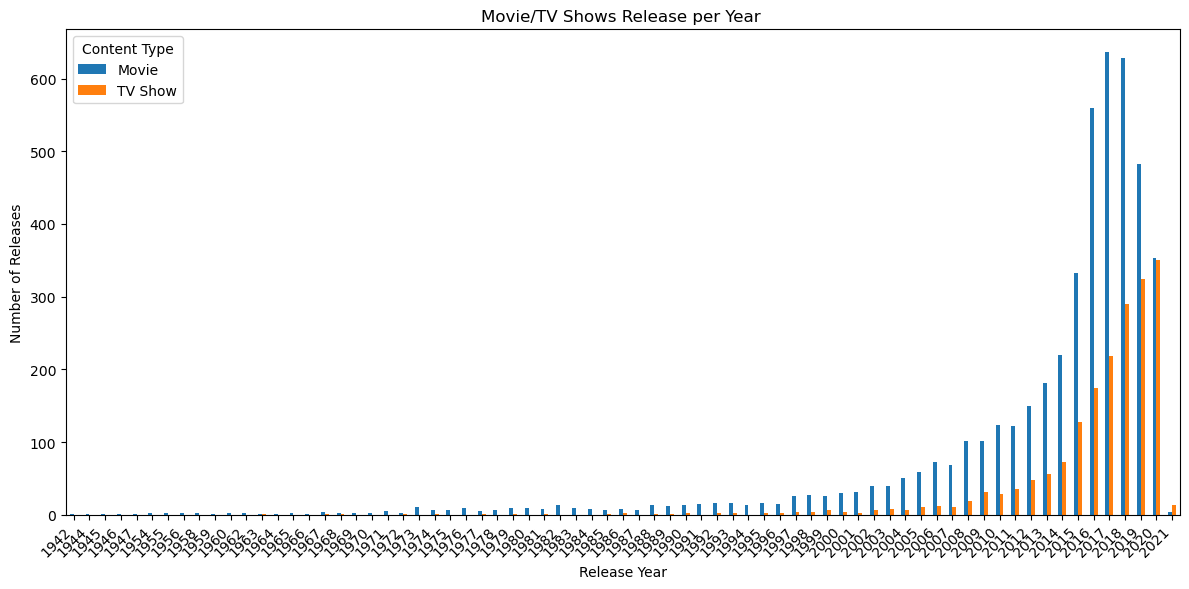

In [61]:
releases_df = df[['release_year', 'type']].astype({'release_year': int})

# Count releases per year and type
yearly_counts = releases_df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Plotting
yearly_counts.plot(kind='bar', figsize=(12, 6), stacked=False)
plt.title('Movie/TV Shows Release per Year ')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

##### Notes: 
- Visualization shows the release no. of movies and tv shows grows exponentially increase after 2000 till 2021.
- There is a significant grwoth from 2016 and 2020

##### - Top 5 rating given for Movies and TV Shows

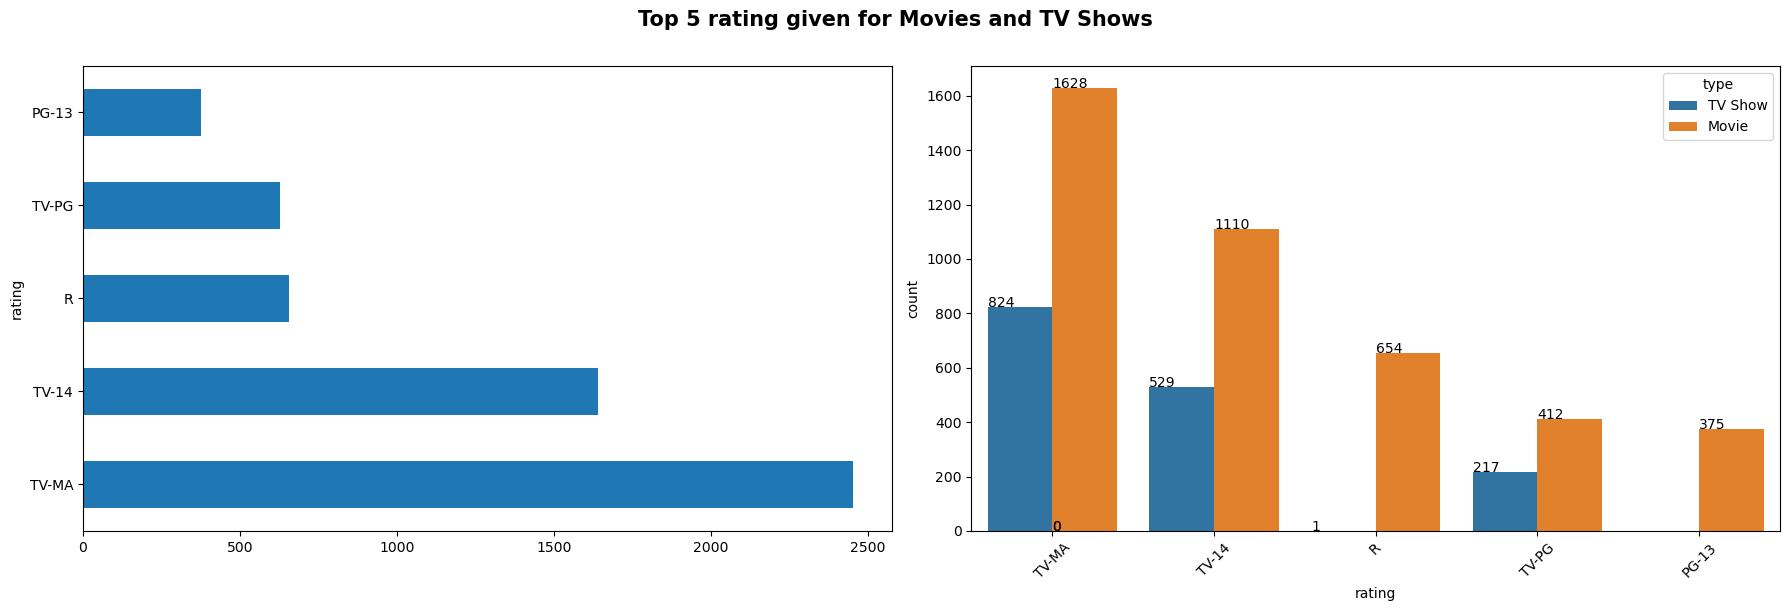

In [63]:
fig,ax = plt.subplots(1,2, figsize=(18,6))
plt.suptitle('Top 5 rating given for Movies and TV Shows', weight='bold', size=15, y=1.01)

# univariate analysis
df.rating.value_counts()[:5].plot(kind='barh', ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:5], ax=ax[1])
plt.xticks(rotation=45)
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

### Visualization 7
##### Description

##### - Creating a Worcloud of most used words in Description

In [66]:
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords

text2 = ' '.join(df['description'].astype(str).tolist())

text2 = re.sub(r'[^A-Za-z\s]', '', text)

text2 = text2.lower()

stops = set(stopwords.words('english'))
text2 = ' '.join(word for word in text2.split() if word not in stops)

In [67]:
text2

'international tv shows tv dramas tv scifi fantasy dramas international movies horror movies international movies action adventure independent movies scifi fantasy dramas international tv shows tv dramas tv mysteries horror movies international movies dramas horror movies international movies horror movies international movies thrillers dramas thrillers crime tv shows international tv shows tv dramas documentaries international movies sports movies independent movies scifi fantasy thrillers dramas international movies thrillers dramas thrillers comedies dramas independent movies sports movies dramas independent movies international movies action adventure dramas international movies dramas international movies dramas international movies anime series international tv shows horror movies international movies thrillers documentaries international movies tv comedies dramas international movies romantic movies dramas international movies romantic movies comedies comedies romantic movies co

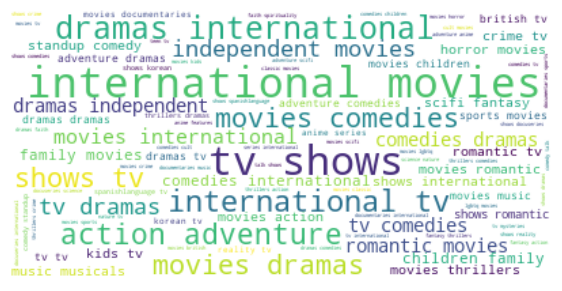

In [68]:
# create the word cloud
wordcloud2 = WordCloud(stopwords=stops,background_color='white').generate(text2)

# plot the word cloud
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud2,  interpolation='bilinear')
plt.axis("off")
plt.show()

##### - Creating a bargrapgh of most used words from Wordcloud

In [70]:
words2 = text2.split()  # Assuming your 'text' variable is already tokenized and cleaned
word_counts2 = Counter(words2)
top_words2 = word_counts2.most_common()
top_words2

[('movies', 4562),
 ('tv', 4107),
 ('international', 3170),
 ('dramas', 2672),
 ('shows', 2134),
 ('comedies', 1879),
 ('action', 840),
 ('adventure', 840),
 ('romantic', 794),
 ('independent', 668),
 ('thrillers', 525),
 ('children', 466),
 ('family', 466),
 ('documentaries', 387),
 ('horror', 369),
 ('crime', 340),
 ('standup', 338),
 ('comedy', 338),
 ('kids', 318),
 ('scifi', 286),
 ('fantasy', 286),
 ('music', 270),
 ('musicals', 270),
 ('anime', 190),
 ('british', 185),
 ('docuseries', 159),
 ('sports', 148),
 ('series', 135),
 ('reality', 132),
 ('korean', 132),
 ('spanishlanguage', 129),
 ('classic', 122),
 ('mysteries', 85),
 ('cult', 84),
 ('lgbtq', 75),
 ('teen', 57),
 ('features', 55),
 ('science', 52),
 ('nature', 52),
 ('faith', 51),
 ('spirituality', 51),
 ('talk', 39)]

In [71]:
sorted_top_words = sorted(top_words2, key=lambda item: item[1])
sorted_top_words

[('talk', 39),
 ('faith', 51),
 ('spirituality', 51),
 ('science', 52),
 ('nature', 52),
 ('features', 55),
 ('teen', 57),
 ('lgbtq', 75),
 ('cult', 84),
 ('mysteries', 85),
 ('classic', 122),
 ('spanishlanguage', 129),
 ('reality', 132),
 ('korean', 132),
 ('series', 135),
 ('sports', 148),
 ('docuseries', 159),
 ('british', 185),
 ('anime', 190),
 ('music', 270),
 ('musicals', 270),
 ('scifi', 286),
 ('fantasy', 286),
 ('kids', 318),
 ('standup', 338),
 ('comedy', 338),
 ('crime', 340),
 ('horror', 369),
 ('documentaries', 387),
 ('children', 466),
 ('family', 466),
 ('thrillers', 525),
 ('independent', 668),
 ('romantic', 794),
 ('action', 840),
 ('adventure', 840),
 ('comedies', 1879),
 ('shows', 2134),
 ('dramas', 2672),
 ('international', 3170),
 ('tv', 4107),
 ('movies', 4562)]

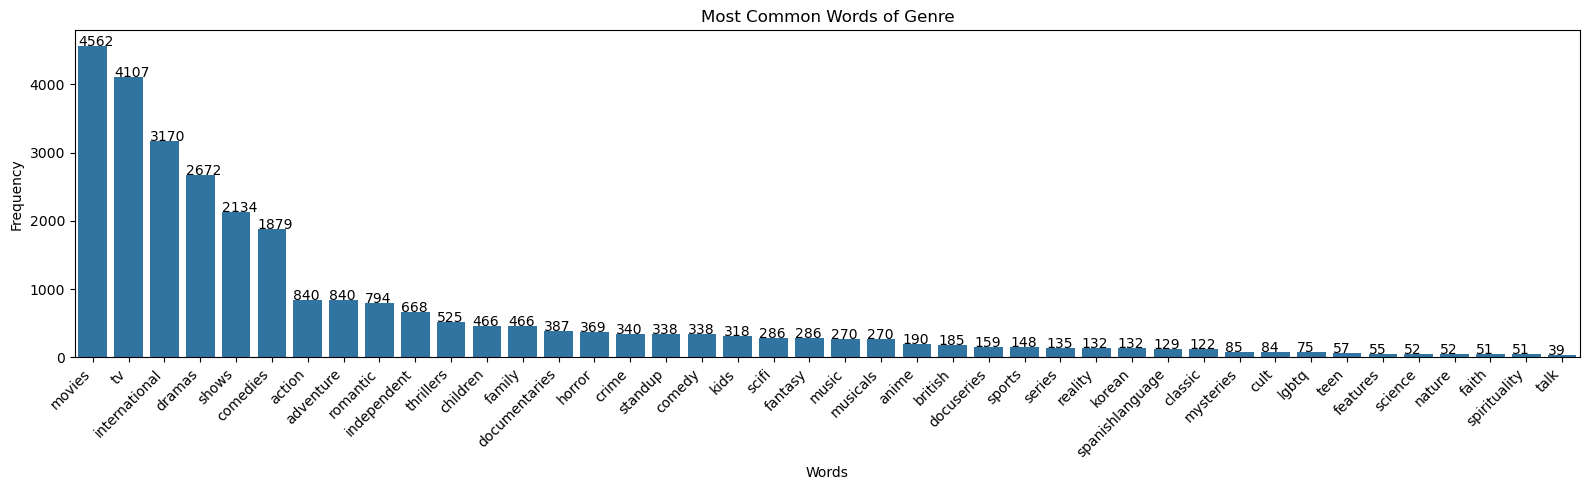

In [72]:
word = [item[0] for item in sorted_words]
count = [item[1] for item in sorted_words]

# 3. Create a Pandas DataFrame
data = {'Word': word, 'Frequency': count}  # Create a dictionary
data = pd.DataFrame(data) 

# plotting graph
plt.figure(figsize=(16,5))
graph = sns.barplot(x=word, y=count, data = data)
graph.set_title('Most Common Words of Genre', size=20)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Words of Genre")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.show()

##### Notes:
- Graph visualizes top common words are movies, tv, international, dramas
- Frequency lies from 4562 to 39

# PreProcessing

- Preprocessing in machine learning refers to the steps taken to transform raw data into a format that can be readily used by machine learning algorithms.
- The goal of preprocessing is to clean, transform, and organize the data to improve the performance and accuracy of machine learning models.

In [74]:
df.columns

Index(['type', 'title', 'cast', 'country', 'release_year', 'rating',
       'listed_in', 'description'],
      dtype='object')

### 1) Creating a new column tags

In [76]:
df.shape

(6652, 8)

##### Notes 
- We have 8 columns
- Creating a new column "tags"
- Combining a cast + listed_in + description

In [81]:
df['tags'] = df['cast'] + df['listed_in'] + df['description']

In [83]:
# Droping these columns cast + director + listed_in + description

df.drop(['cast'], axis=1, inplace=True)
df.drop(['listed_in'], axis=1, inplace=True)
df.drop(['description'], axis=1, inplace=True)

In [85]:
df.head()

type  title        country  release_year rating  \
0  TV Show     3%         Brazil          2020  TV-MA   
1    Movie   7:19         Mexico          2016  TV-MA   
2    Movie  23:59      Singapore          2011      R   
3    Movie      9  United States          2009  PG-13   
4    Movie     21  United States          2008  PG-13   

                                                tags  
0  João Miguel, Bianca Comparato, Michel Gomes, R...  
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...

#### Doing Text Vectorization on tags

- Text Vectorization is the process of converting text data into numerical vectors. Machine learning models typically require numerical input, so to work with text, we need to transform it into a format that these algorithms can understand and process.

In [87]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bsson\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [89]:
def transform_text(text3):
    # 1. Lower Case
    text3 = text3.lower()
    
    # 2. Tokenization
    from nltk.tokenize import word_tokenize
    text3 = word_tokenize(text3)
    
    # 3. Removing Special characters
    import re
    text3 = [re.sub(r'[@#$]', '', t) for t in text3]
    
    # 4. Removing Special characters
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    text3 = [word for word in text3 if word not in stop_words]
    
    # 5. Stemming
    from nltk.stem import PorterStemmer
    st = PorterStemmer()
    text3 = [st.stem(word) for word in text3]
    
    # 6. List
    y = []
    for i in text3:
        if i.isalnum():
            y.append(i)
    text3 = y
    
    return " ".join(text3)

In [91]:
# df["transformed_text"] = 
df["tags"]=df["tags"].apply(transform_text)
df["tags"][0]

'joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschiintern tv show tv drama tv fantasyin futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

##### Notes 1:

Create a define function:
- Lower Case: Converts the input text to lowercase.
- Tokenization: Splits the text into individual words (tokens).
- Removing Special Characters
- Removing Stopwords: Filters out common English words (like "the", "is", "in") using the NLTK stopwords list.
- Stemming: Reduces words to their root form using the Porter Stemmer.
- Keeps Alphanumeric: Filters the tokens to keep only those that are alphanumeric.
- Joins Back: Combines the processed tokens back into a single string, separated by spaces.

##### Notes 2:
Apply a function on column tags

##### - Text Vectorizer on tags

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 5000)   

# fit the vectorizer using the text data
tags_tfidf= tfidf.fit_transform(df['tags'])
tags_tfidf.shape

(6652, 5000)

##### Notes:
- Apply text vectorizer on transformed text of column tags
- Using max features only 5000 for better execution

### 2) Doing Text Vectorization on Title

In [94]:
df['title']

0                          3%
1                        7:19
2                       23:59
3                           9
4                          21
                ...          
7780                      Zoo
7781                     Zoom
7782                     Zozo
7783                   Zubaan
7785    Zumbo's Just Desserts
Name: title, Length: 6652, dtype: object

In [95]:
df["title"]=df["title"].apply(transform_text)
df["title"][83]

'20th centuri women'

##### Text Vectorizer on 'title'

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the object of tfid vectorizer
tfidf2 = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 5000)   

# fit the vectorizer using the text data
title_tfidf = tfidf2.fit_transform(df['title'])
title_tfidf.shape

(6652, 5000)

### 3) Doing Label Encoding on Type

- Label Encoding is a technique used to convert categorical data into numerical data. Specifically, it assigns a unique numerical label (starting from 0) to each unique category in a categorical feature.

In [97]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [104]:
# 1. Fit the label encoder
df['type_2']= le.fit_transform(df['type'])
df['type_2'].unique()

array([1, 0])

In [106]:
# 2. Get the Mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# 3. Print the Mapping
print("Label Encoding Mapping:")
for category, encoded_value in mapping.items():
    print(f"{category}  ->  {encoded_value}")

mapping_df = pd.DataFrame(list(mapping.items()), columns=['Type', 'Encoded Value'])
print("\nMapping DataFrame:")
print(mapping_df)

Label Encoding Mapping:
Movie  ->  0
TV Show  ->  1

Mapping DataFrame:
      Type  Encoded Value
0    Movie              0
1  TV Show              1


### 4) Doing Label Encoding on Country

In [108]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Split the 'country' strings into lists of individual countries
df['country'] = df['country'].fillna('').apply(lambda x: x.split(', '))

# 2. Create a list of all unique individual countries
unique_countries = []
for countries in df['country']:
    unique_countries.extend(countries)
unique_countries = list(set(unique_countries))  # Remove duplicates

# 3. Apply Label Encoding to the list of individual countries
le_country = LabelEncoder()
le_country.fit(unique_countries)  # Fit on the unique countries

# 4. Transform the 'country' column to use the encoded values
def encode_country_list(countries):
    return [le_country.transform([country])[0] for country in countries if country]  # Encode each country in the list, handling empty strings

df['country'] = df['country'].apply(encode_country_list)

# To see the mapping:
mapping_country = dict(zip(le_country.classes_, le_country.transform(le_country.classes_)))
print("Label Encoding Mapping for Individual Countries:")
for country, encoded_value in mapping_country.items():
    print(f"{country}  ->  {encoded_value}")

# Display the first few rows with the encoded countries
print("\nDataFrame with encoded countries:")
print(df[['title', 'country']].head())

Label Encoding Mapping for Individual Countries:
Afghanistan  ->  0
Albania  ->  1
Algeria  ->  2
Angola  ->  3
Argentina  ->  4
Australia  ->  5
Austria  ->  6
Azerbaijan  ->  7
Bahamas  ->  8
Bangladesh  ->  9
Belarus  ->  10
Belgium  ->  11
Bermuda  ->  12
Brazil  ->  13
Bulgaria  ->  14
Cambodia  ->  15
Cambodia,  ->  16
Canada  ->  17
Cayman Islands  ->  18
Chile  ->  19
China  ->  20
Colombia  ->  21
Croatia  ->  22
Cuba  ->  23
Cyprus  ->  24
Czech Republic  ->  25
Denmark  ->  26
Dominican Republic  ->  27
East Germany  ->  28
Ecuador  ->  29
Egypt  ->  30
Finland  ->  31
France  ->  32
Georgia  ->  33
Germany  ->  34
Ghana  ->  35
Greece  ->  36
Guatemala  ->  37
Hong Kong  ->  38
Hungary  ->  39
Iceland  ->  40
India  ->  41
Indonesia  ->  42
Iran  ->  43
Iraq  ->  44
Ireland  ->  45
Israel  ->  46
Italy  ->  47
Jamaica  ->  48
Japan  ->  49
Jordan  ->  50
Kenya  ->  51
Kuwait  ->  52
Latvia  ->  53
Lebanon  ->  54
Liechtenstein  ->  55
Lithuania  ->  56
Luxembourg  ->  57
Ma

### 5) Doing Label Encoding on Rating

In [109]:
df['rating']= le.fit_transform(df['rating'])
df['rating'].unique()

array([ 8,  5,  4,  6,  9,  7, 10,  2, 11,  3,  0,  1, 12, 13])

In [112]:
# 2. Get the Mapping
mapping3 = dict(zip(le.classes_, le.transform(le.classes_)))

# 3. Print the Mapping
print("Label Encoding Mapping:")
for category3, encoded_value3 in mapping3.items():
    print(f"{category3}  ->  {encoded_value3}")


Label Encoding Mapping:
G  ->  0
NC-17  ->  1
NR  ->  2
PG  ->  3
PG-13  ->  4
R  ->  5
TV-14  ->  6
TV-G  ->  7
TV-MA  ->  8
TV-PG  ->  9
TV-Y  ->  10
TV-Y7  ->  11
TV-Y7-FV  ->  12
UR  ->  13


In [114]:
df.head()

type title country  release_year  rating  \
0  TV Show     3    [13]          2020       8   
1    Movie          [62]          2016       8   
2    Movie          [87]          2011       5   
3    Movie     9   [106]          2009       4   
4    Movie    21   [106]          2008       4   

                                                tags  type_2  
0  joão miguel bianca comparato michel gome rodol...       1  
1  demián bichir héctor bonilla oscar serrano aza...       0  
2  tedd chan stella chung henley hii lawrenc koh ...       0  
3  elijah wood john reilli jennif connelli christ...       0  
4  jim sturgess kevin spacey kate bosworth aaron ...       0

### Scaling all features

- Scaling in machine learning is a preprocessing technique used to standardize the range of independent variables or features of the data. 
- It puts all the features on a similar scale.

In [116]:
# Fix country column: convert [15] → 15
df['country'] = df['country'].apply(lambda x: x[0] if isinstance(x, list) else x)

In [118]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# Combine all features into a single array/matrix
# If TF-IDF outputs are sparse, use hstack; else, use np.hstack

X = np.hstack([
    tags_tfidf.toarray(),
    title_tfidf.toarray(),
    df[['type_2', 'country', 'rating', 'release_year']].values
])

# Scale the combined matrix
scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse data
X_scaled = scaler.fit_transform(X)

##### Notes:
- Combines text (TF-IDF) and other features.
- Initializes a StandardScaler (without centering).
- Scales the combined features.

## Modeling 

In [119]:
# Import the libraries
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

### 1) PCA & Incremental PCA

- PCA: Reduces dimensions by finding principal components (most variance). Needs all data in memory.
- Incremental PCA: Reduces dimensions for large datasets by processing in batches (memory-efficient).

In [122]:
from sklearn.decomposition import PCA, IncrementalPCA

In [124]:
# For PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [125]:
# For IPCA
ipca = IncrementalPCA(n_components=2, batch_size=10)
X_ipca = ipca.fit_transform(X)

In [128]:
df['type']

0       TV Show
1         Movie
2         Movie
3         Movie
4         Movie
         ...   
7780      Movie
7781      Movie
7782      Movie
7783      Movie
7785    TV Show
Name: type, Length: 6652, dtype: object

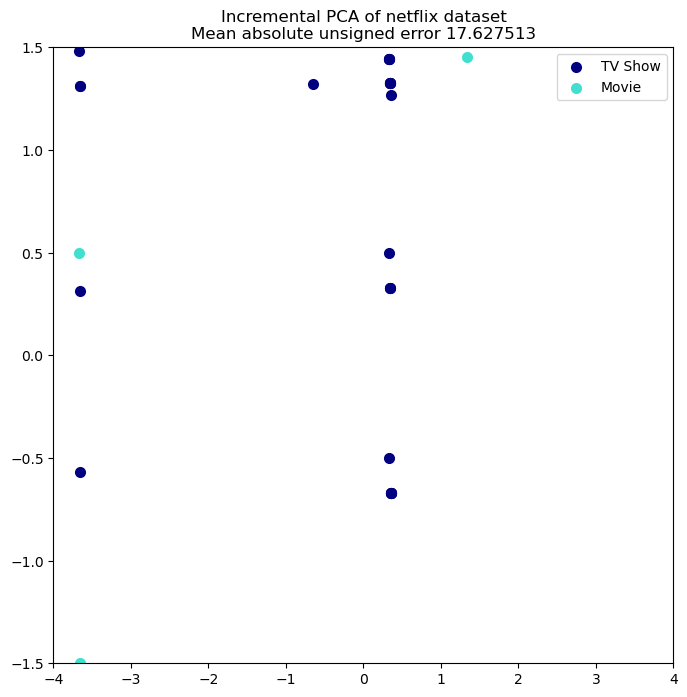

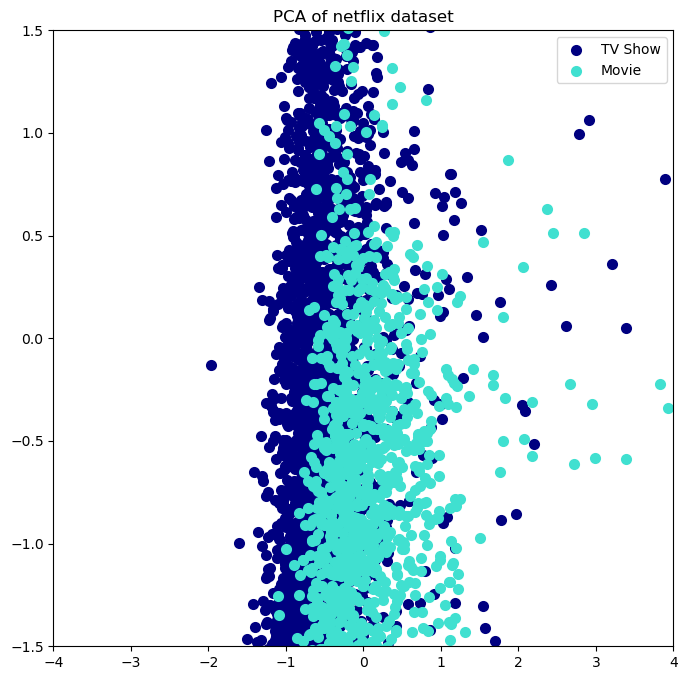

In [127]:
colors = ["navy", "turquoise"]

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], df['type']):
        plt.scatter(
            X_transformed[df['type_2'] == i, 0],
            X_transformed[df['type_2'] == i, 1],
            color=color,
            lw=2,
            label=target_name,
        )

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of netflix dataset\nMean absolute unsigned error %.6f" % err)
    else:
        plt.title(title + " of netflix dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

##### Notes:
**Intrepretation of graph 1 : Incremental PCA**
- 2D Projection: Data (TV Shows and Movies) is shown in 2D after Incremental PCA.
- Color-Coded: Dark blue for TV Shows, light turquoise for Movies.
- Partial Separation: Some visual separation between content types.

**Intrepretation of graph 2 : PCA**
- 2D Projection: Netflix data (Movies and TV Shows) reduced to two principal components.
- Color-Coded: Blue for TV Shows, turquoise for Movies.
- Partial Separation: Some visual distinction between content types, but significant overlap.
- Variance: Spread suggests the importance of each principal component.
- Outliers: A few data points lie away from the main clusters.

## 2) K Means

- K-Means is a popular unsupervised machine learning algorithm used for clustering.
- Its goal is to partition n data points into k clusters in which each data point belongs to the cluster with the nearest mean (centroid).

In [146]:
## 1)  Creating a Elbow graph to decide no. of K clusters
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit_predict(X_scaled) 
    wcss.append(kmeans.inertia_)

In [147]:
wcss

[66546608.00000124,
 66532039.946571305,
 66508964.35542931,
 66494197.979441,
 66474676.485098556,
 66465502.81890391,
 66451192.158808775,
 66431020.171488136,
 66411301.540723555,
 66396367.51623394]

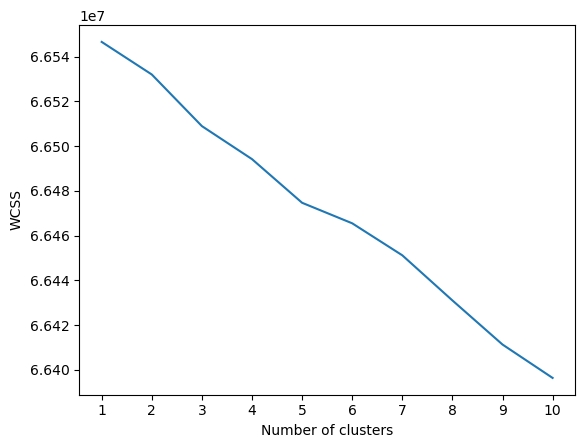

In [148]:
plt.plot(range(1, 11), wcss) 
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### Notes:
- The graph is an Elbow Method plot used to estimate the optimal number of clusters for K-Means.
- The x-axis shows the number of clusters, and the y-axis displays the Within-Cluster Sum of Squares (WCSS).
- The goal is to find the "elbow" point, where the decrease in WCSS starts to level off, indicating that adding more clusters provides diminishing returns.
- Visually, the rate of decrease in WCSS is sharp initially and starts to become less steep between 3 - 4 clusters.
- This suggests that 3 or 4 might be a reasonable choice for the optimal number of clusters for the K-Means algorithm applied to your data.
- Adding more clusters doesn't seem to reduce the WCSS as significantly.

In [160]:
## 2) Training the KMeans Model
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [162]:
y_kmeans

array([1, 1, 1, ..., 1, 1, 1])

##### Notes:
- K-Means (4 clusters): Initializes and trains a K-Means model.
- Predicts clusters: Assigns data points to one of the 4 clusters.
- Output: Shows cluster assignments (all shown are in cluster 1).

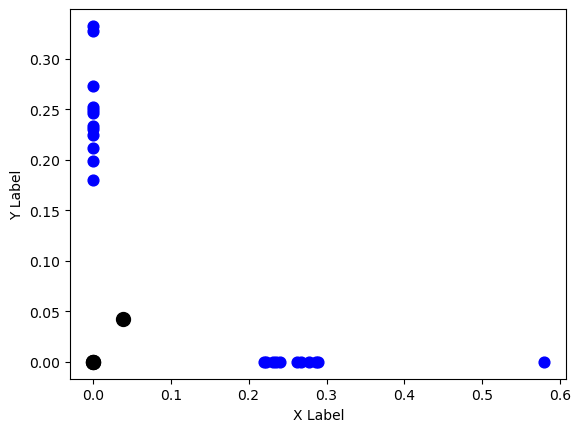

In [164]:
# 3) Plotting the Cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'pink', label = 'Cluster4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('X Label') 
plt.ylabel('Y Label')
plt.show()

##### Notes:
- Four Clusters Plotted: Visualizes the four clusters found by K-Means using different colors.
- Cluster 2 Dominant: Most data points appear to belong to the blue cluster.
- Two Main Visual Clusters: Primarily see a red cluster (higher Y) and a blue cluster (lower Y, wider X).
- Centroids Shown: Black points indicate the center of each cluster.
- Clusters 3 & 4 Not Distinct: Green and pink clusters are not clearly visible in this 2D view.

In [166]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve='convex' , direction = 'decreasing', interp_method='polynomial')
print(kl.elbow)

4


##### Notes:
- Imports elbow finder: Uses a tool to automatically find the elbow.
- Finds the elbow: Analyzes the WCSS curve.
- Prints result: The detected optimal number of clusters is 4.

#### Using Silhouette Score on KMeans

- The Silhouette Score is a metric used to evaluate the quality of clusters formed by a clustering algorithm like K-Means.
- It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [168]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)  # Replace with your dataset
    score = silhouette_score(X_scaled, labels)
    silhouette_coefficients.append(score)
    print(f'k={k}, Silhouette Score={score:.4f}')

k=2, Silhouette Score=0.0018
k=3, Silhouette Score=-0.0010
k=4, Silhouette Score=-0.0218
k=5, Silhouette Score=-0.0217
k=6, Silhouette Score=-0.0437
k=7, Silhouette Score=-0.0437
k=8, Silhouette Score=-0.0437
k=9, Silhouette Score=-0.0437
k=10, Silhouette Score=-0.0436


##### Notes:
- Imports silhouette_score: Imports the function to calculate the Silhouette Score.
- Iterates through cluster numbers: Loops through a range of possible cluster counts (from 2 to 10).
- Trains K-Means: For each number of clusters (k), it trains a K-Means model.
- Calculates Silhouette Score: Computes the Silhouette Score for the clustering result.
- Stores Scores: Appends each calculated score to the silhouette_coefficients list.
- Prints Scores: Displays the Silhouette Score for each value of k.

In [169]:
# Plotting Silhouette Score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('No. Of Clusters') 
plt.ylabel('Silhouette Coefficients')
plt.show()

##### Notes
- Low Scores: Overall Silhouette Scores are low (near zero or negative)
- Peak at k=2: The highest score occurs with 2 clusters.
- Decreasing Trend: Scores generally decrease as the number of clusters increases beyond 2.

## 3) Hierarchical Clustering

- Hierarchical Clustering is a clustering algorithm that builds a hierarchy of clusters.
- It doesn't require specifying the number of clusters beforehand.
- Instead, it creates a tree-like structure (called a dendrogram) that represents the nested grouping of data points.

There are two main types of hierarchical clustering:

a) Agglomerative (Bottom-up):
- Starts with each data point as a single cluster.
- Iteratively merges the closest pairs of clusters until all data points belong to a single cluster or a stopping criterion is met.

b) Divisive (Top-down):
- Starts with all data points in one cluster.
- Iteratively splits the most heterogeneous cluster into two until each data point forms its own cluster or a stopping criterion is met.

- In this case, using Agglomerative Clustering

In [171]:
# Agglomerative Clustering
# Step 1) Constructing Dendogram
import scipy.cluster.hierarchy as sc

# plot the dendogram
plt.figure(figsize=(20,7))
plt.title('Dendograms')

# create a dendogram
sc.dendrogram(sc.linkage(X_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Netflix Shows') 
plt.ylabel('Eculedian Distance')
plt.axhline(y= 4, color='r', linestyle='--')
plt.show()

##### Notes:
- Imports: Loads hierarchical clustering tools.
- Plot Setup: Configures the dendrogram plot.
- Dendrogram Creation: Generates the dendrogram using 'ward' linkage.
- Labels & Line: Adds axis labels and a horizontal line.
- Displays: Shows the dendrogram.

**Intrepretation of graph**
- Hierarchical Clustering: Shows how Netflix content is grouped.
- Merge Height = Dissimilarity: Higher merges mean less similar clusters.
- Red Line Suggests Clusters: The red dashed line hints at around 3 potential clusters.
- Early Groupings: Some content is quite similar and merges early.
- Structure Visible: The dendrogram reveals the hierarchical structure of content similarity.

In [175]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster.fit_predict(X_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [176]:
cluster.labels_      

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Using Silhouette Score on Agglomerative Clustering

In [178]:
silhouette_coefficients = []
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agglo.fit_predict(X_scaled)  
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)
    print(f'k={k}, Silhouette Score={score:.4f}')

k=2, Silhouette Score=0.0732
k=3, Silhouette Score=-0.0054
k=4, Silhouette Score=-0.0042
k=5, Silhouette Score=-0.0040
k=6, Silhouette Score=-0.0038
k=7, Silhouette Score=-0.0035
k=8, Silhouette Score=-0.0066
k=9, Silhouette Score=-0.0064
k=10, Silhouette Score=-0.0062


##### Notes:
- Agglomerative Clustering: Applied hierarchical clustering.
- Silhouette Score Evaluated: Calculated cluster quality for 2 to 10 clusters.
- k=2 Best (Slightly): Highest Silhouette Score (0.0732) at 2 clusters.

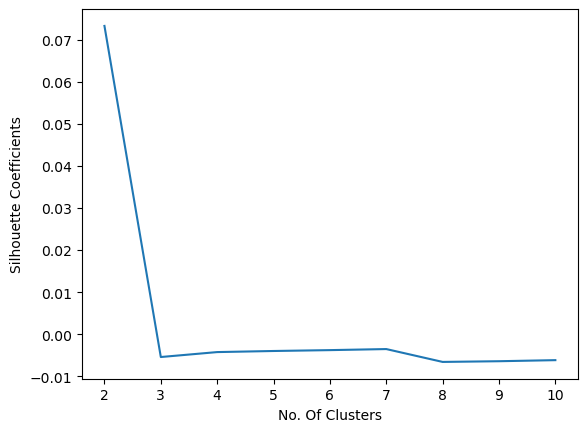

In [179]:
# Plotting Silhouette Score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('No. Of Clusters') 
plt.ylabel('Silhouette Coefficients')
plt.show()

##### Notes:
- X-axis: Number of clusters (2 to 10).
- Y-axis: Silhouette Coefficients.
- Peak at k=2: The highest Silhouette Score is at 2 clusters (around 0.07).
- Sharp Decline: The score drops sharply after 2 clusters.
- Low Scores Overall: Silhouette Scores are generally low, indicating less than ideal cluster separation.
- In essence, this plot suggests that for Agglomerative Clustering, 2 clusters provide the best.

## 4) DBSCAN Clustering

- DBSCAN is a density-based clustering algorithm.
- Unlike K-Means, it doesn't assume clusters are spherical and can find clusters of arbitrary shapes.
- It also has a notion of "noise" - data points that do not belong to any cluster.
  
- It has two main parameters:
- a) eps (Epsilon): The maximum distance between two data points for them to be considered as neighbors.
- b) minPts: The minimum number of data points in the neighborhood of a point (including the point itself) to be considered a core point.

In [180]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

In [181]:
dbscan.fit_predict(X_scaled)

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [182]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

##### Notes:
- Parameters Set: eps=0.5, min_samples=5.
- All Noise: All data points classified as noise (-1).

In [184]:
# Visualize
plt.figure(figsize=(10, 6))
unique_labels = np.unique(labels)

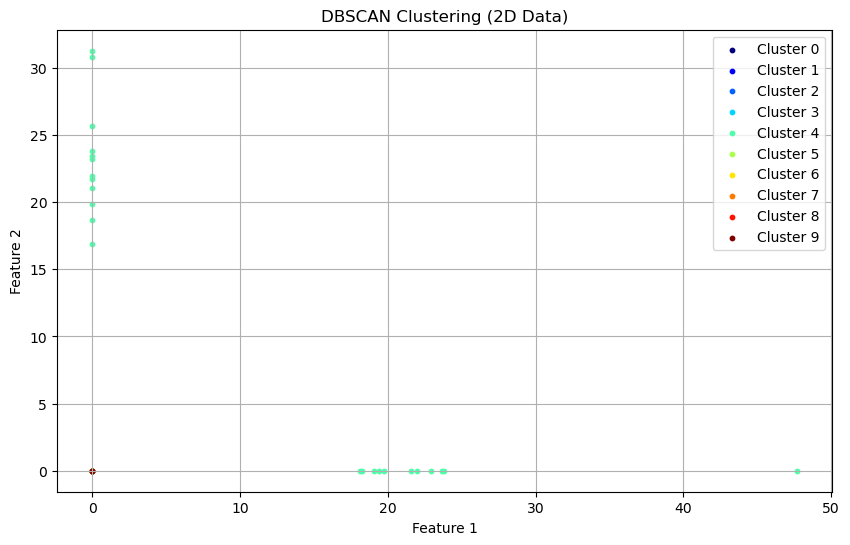

In [185]:
for label in unique_labels:
    mask = labels == label
    color = 'k' if label == -1 else plt.cm.jet(float(label) / max(unique_labels))
    label_name = 'Noise' if label == -1 else f'Cluster {label}'
    plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], 
                s=10, c=[color], label=label_name)

plt.title("DBSCAN Clustering (2D Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

##### Notes:
- DBSCAN Result: The plot visualizes the clusters found by DBSCAN in a 2D space.
- Noise Identified: Black points represent noise (-1 label), data points that didn't fit into any dense cluster.
- Multiple Clusters Found: The legend indicates the presence of several clusters (Cluster 0 to Cluster 9), each represented by a different color.
- Varying Cluster Sizes and Shapes: DBSCAN has identified clusters of different sizes and potentially non-spherical shapes, which is characteristic of the algorithm.
- Sparse Clustering: Many points appear to be classified as noise, suggesting that dense regions in the data might be relatively isolated.
- In essence, DBSCAN found multiple clusters and identified a significant portion of the data as noise based on the chosen eps and min_samples.

#### Using Silhouette Score on DBSCAN

In [186]:
silhouette_scores = []
eps_values = np.arange(0.1, 2.0, 0.1)

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_scaled)
    
    # Remove noise points (-1) for silhouette score
    mask = labels != -1
    if len(set(labels[mask])) > 1:
        score = silhouette_score(X_scaled[mask], labels[mask])
    else:
        score = -1  # Invalid score when only one cluster
    silhouette_scores.append(score)
    print(f'eps={eps:.2f}, Silhouette Score={score:.4f}')

eps=0.10, Silhouette Score=-1.0000
eps=0.20, Silhouette Score=-1.0000
eps=0.30, Silhouette Score=-1.0000
eps=0.40, Silhouette Score=-1.0000
eps=0.50, Silhouette Score=-1.0000
eps=0.60, Silhouette Score=-1.0000
eps=0.70, Silhouette Score=-1.0000
eps=0.80, Silhouette Score=-1.0000
eps=0.90, Silhouette Score=-1.0000
eps=1.00, Silhouette Score=-1.0000
eps=1.10, Silhouette Score=-1.0000
eps=1.20, Silhouette Score=-1.0000
eps=1.30, Silhouette Score=-1.0000
eps=1.40, Silhouette Score=-1.0000
eps=1.50, Silhouette Score=-1.0000
eps=1.60, Silhouette Score=-1.0000
eps=1.70, Silhouette Score=-1.0000
eps=1.80, Silhouette Score=-1.0000
eps=1.90, Silhouette Score=-1.0000


##### Notes:
- Iterates eps: The code calculates the Silhouette Score for various eps values (from 0.1 to 2.0).
- Noise Excluded: It specifically excludes noise points (label -1) when calculating the Silhouette Score.
- Consistently Bad Scores: The Silhouette Score is -1.0000 for almost all tested eps values.
- Invalid Score for Single Cluster: If only noise points are left after excluding -1, the score is set to -1.
- Interpretation: The consistently negative Silhouette Scores indicate very poor clustering. This suggests that for the tested range of eps (with min_samples=5), DBSCAN is not forming well-separated clusters. A score of -1 typically implies that data points are likely assigned to the wrong cluster.

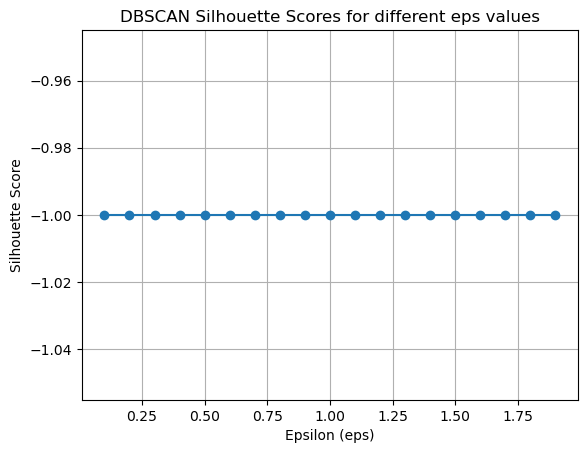

In [187]:
# Plot
plt.plot(eps_values, silhouette_scores, marker='o')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.title('DBSCAN Silhouette Scores for different eps values')
plt.grid(True)
plt.show()

##### Notes:
Interpretation: This plot visually confirms the previous output. The persistently negative Silhouette Score of -1.0 indicates that for all the tested eps values (with min_samples=5), the DBSCAN clustering resulted in very poor separation, where data points are likely more similar to points in other "clusters" than to those in their own. This suggests that DBSCAN with these parameter settings is not producing meaningful clusters for this data.

# Conclusions:

- This analysis of the Netflix dataset, guided by the principles of effective data analysis, reveals key insights into the platform's content and provides a foundation for understanding its strategic direction.

- The dataset, comprising 7787 entries with 12 columns, offers a multifaceted view of Netflix's content, show ID, content type, title, director, cast, country, date added, release year, rating, duration, genre, and description. The predominance of object-type features, with release_year as the primary numerical variable, indicates that clustering analysis would likely emphasize categorical data.

###### Several important trends and characteristics were identified:

- Content Skew: The dataset exhibits a higher volume of movies compared to TV shows, suggesting a historical emphasis on film content within Netflix's catalog.

- Production Growth: A general increase in content production is observed over the years, although the drop in 2021 warrants further investigation. This could be due to data limitations or external factors like the COVID-19 pandemic.

- Duration Variance: Movie durations vary widely, reflecting diverse film formats, while TV shows tend to have shorter durations, often limited to a single season.

- Genre Focus: Documentaries are a significant genre within the dataset, indicating a potential strategic focus on non-fiction content.

###### In line with the project's objectives, the analysis underscores the importance of:

Here are some key takeaways from the analysis approach:

- Data Visualization: The project effectively utilizes a variety of data visualization techniques to explore the Netflix dataset. Visualizations of content distribution, temporal trends, and genre representation enhance understanding. The dendrogram provides a hierarchical view of the data, allowing for exploration of potential cluster groupings based on distance.

- Exploratory Data Analysis (EDA): Proper handling of missing values, no duplicate found as well as no outlier detection beacuse most of the data is object data tye

- Preprocessing: Creating a new column tags applying techniques like TF-IDF with a selection of 5000 features, are used for vectorization, and label encoding is applied to categorical variables.

- Modeling: The project explores the application of three clustering algorithms—K-means, Agglomerative Hierarchical Clustering, and DBSCAN—to segment Netflix's content.

- PCA: This project could benefit from dimensionality reduction techniques such as PCA to improve the visualization and interpretation of high-dimensional data, potentially leading to more refined clusters.

- K-means aims to partition data into k clusters, where each data point belongs to the cluster with the nearest mean (centroid). In the context of Netflix, K-means might identify groups of content with similar characteristics, such as genre preferences and release year trends.

- Agglomerative Hierarchical Clustering builds a hierarchy of clusters by iteratively merging the closest pairs of clusters until a single cluster remains. This method can reveal the hierarchical relationships between different content categories on Netflix, such as how specific genres group together.

- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups together data points that are close to each other (high density) while marking outliers as noise. For Netflix data, DBSCAN could be used to find dense clusters of popular content and identify less common or niche content.

- Models and Silhouette Scores: The project employs silhouette scores to evaluate the quality of the clustering models. K-means demonstrates the strongest performance, suggesting that it effectively identifies more distinct and well-separated clusters within the Netflix data. The visualization graphs showing clearer cluster boundaries for K-means compared to the other methods.  The interpretation of the clusters would then focus on the characteristics that define these K-means-derived segments, such as genre combinations, production trends, or content durations.


#### Intrepretation:
The Netflix dataset provides valuable insights into the platform's content strategy and characteristics. The dominance of movies, the growth in content production, and the variations in content duration and genre distribution offer a foundation for understanding Netflix's content acquisition, production, and programming decisions. The analysis also highlights the importance of a rigorous data analysis methodology, from initial data exploration to final cluster interpretation, to ensure the project's usefulness to stakeholders.



### Conclusion: How This Dataset Helps Stakeholders
- Content Strategists: Identify popular content clusters and gaps for better content planning.
- Marketing Teams: Create targeted campaigns using user-content cluster insights.
- Product/UX Teams: Enhance recommendations and UI personalization based on content grouping.
- Business Executives: Support data-driven decisions on content investment and portfolio strategy.
- Data Teams: Use clusters for feature engineering, trend analysis, and anomaly detection.